In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
df = pd.read_csv("inputData/lianjia.csv")

In [4]:
df.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [6]:
df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [7]:
df1 = df.copy()

In [8]:
df1["avgPrice"] = df["Price"] / df["Size"]
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'avgPrice', 'Price']
df = pd.DataFrame(df1,columns=columns)

In [9]:
df.head()

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,avgPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0


In [24]:
df_house_count = df1.groupby("Region")["Price"].count().sort_values(ascending = False).to_frame()
df_house_mean = df1.groupby("Region")["avgPrice"].mean().sort_values(ascending = False).to_frame().reset_index()
df_house_count

,Price
Region,
海淀,2983
朝阳,2973
丰台,2952
昌平,2811
西城,2130
大兴,2115
通州,1601
东城,1533
房山,1442


In [11]:
sns.set_style({'font.sans-serif':['simhei','Arial']})

Text(0,0.5,'房屋总价')

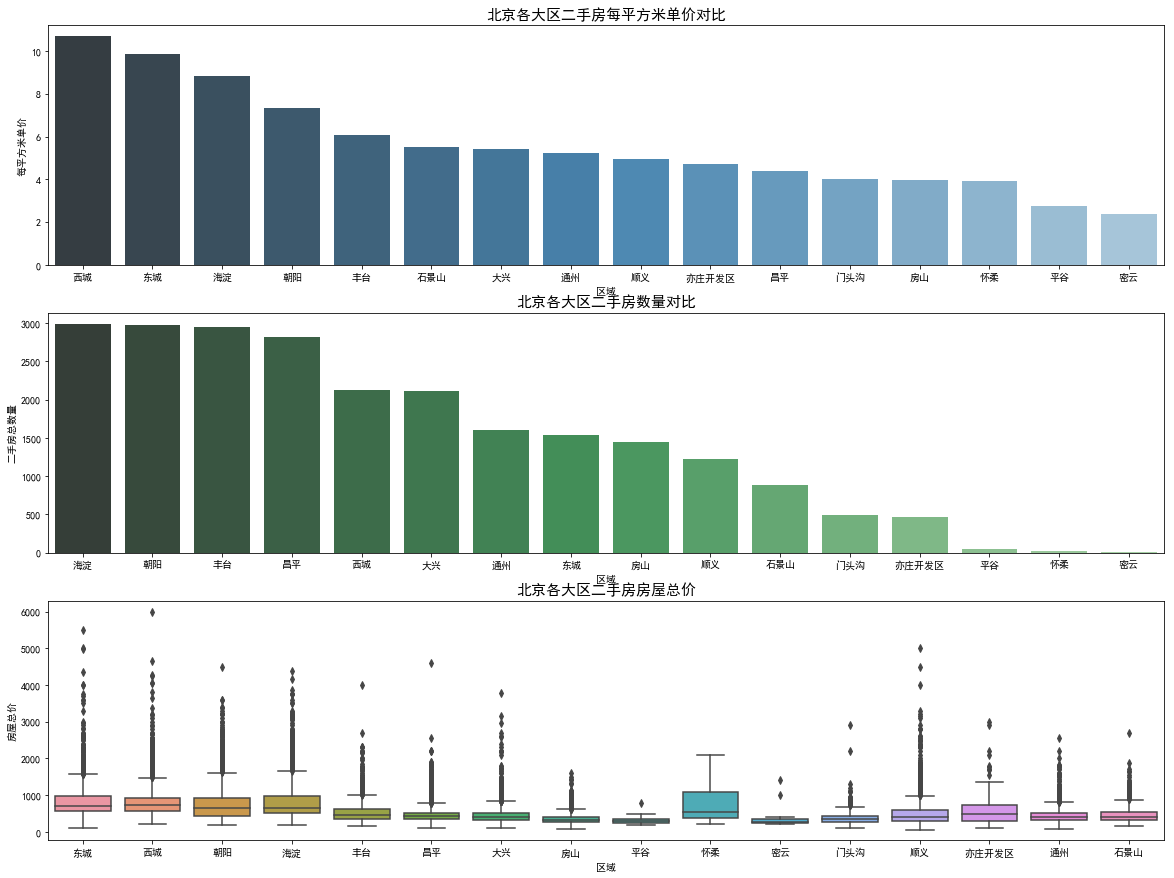

In [12]:
f,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = (20,15))
sns.barplot(x='Region',y="avgPrice",palette="Blues_d",data=df_house_mean,ax=ax1)
ax1.set_title("北京各大区二手房每平方米单价对比",fontsize=15)
ax1.set_xlabel("区域")
ax1.set_ylabel("每平方米单价")

sns.barplot(x="Region",y="Price",palette="Greens_d",data=df_house_count,ax=ax2)
ax2.set_title("北京各大区二手房数量对比",fontsize=15)
ax2.set_xlabel("区域")
ax2.set_ylabel("二手房总数量")

sns.boxplot(x="Region",y="Price",data=df,ax=ax3)
ax3.set_title("北京各大区二手房房屋总价",fontsize=15)
ax3.set_xlabel("区域")
ax3.set_ylabel("房屋总价")

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


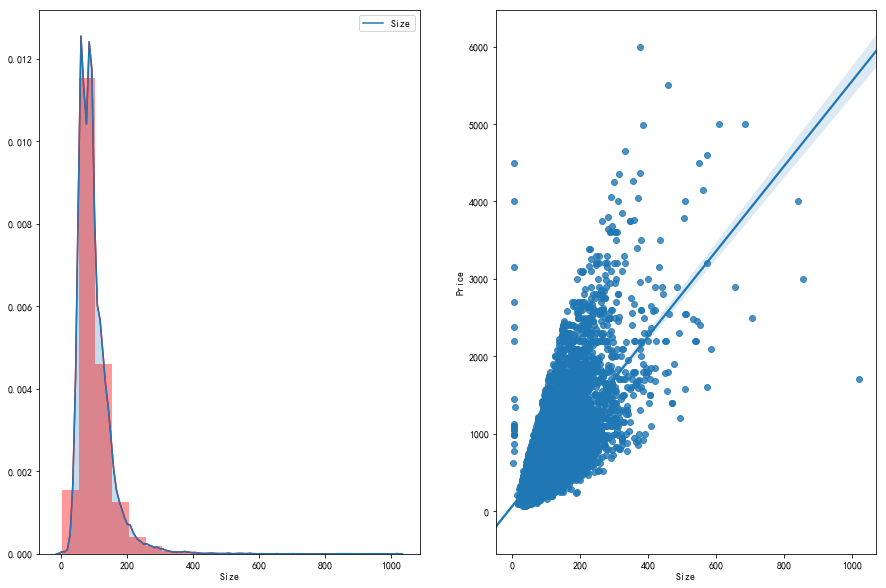

In [13]:
f,[ax1,ax2] = plt.subplots(1,2,figsize=(15,10))
sns.distplot(df["Size"],bins = 20,color="r",ax=ax1)
sns.kdeplot(df["Size"],ax=ax1,shade=True)
sns.regplot(x="Size",y="Price",ax=ax2,data=df)
plt.show()

In [14]:
df.loc[df["Size"] < 10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,avgPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


In [15]:
df.loc[df["Size"] > 1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,avgPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


In [16]:
df = df.loc[(df["Layout"] != "层拼别墅") & (df["Size"] < 1000)]

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


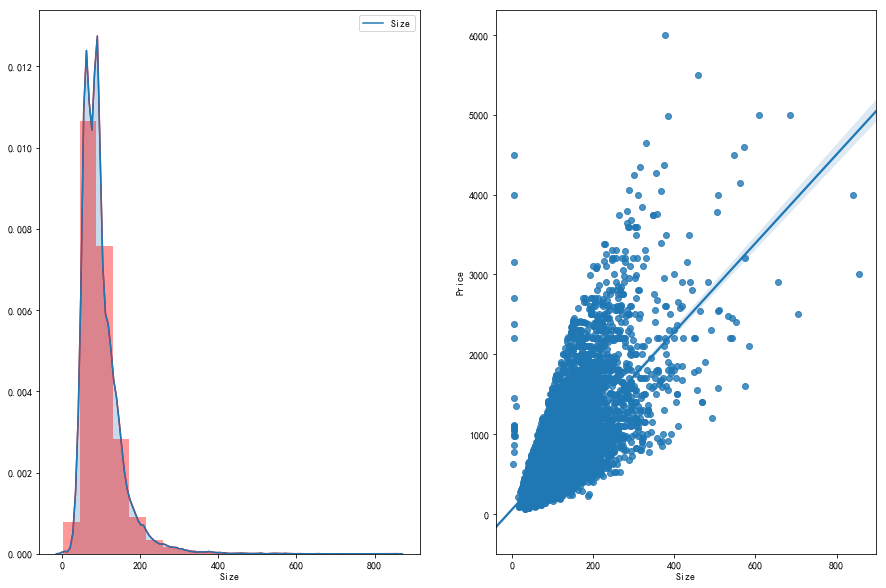

In [17]:
f,[ax1,ax2] = plt.subplots(1,2,figsize=(15,10))
sns.distplot(df["Size"],bins = 20,color="r",ax=ax1)
sns.kdeplot(df["Size"],ax=ax1,shade=True)
sns.regplot(x="Size",y="Price",ax=ax2,data=df)
plt.show()

Text(464.62,0.5,'户型')

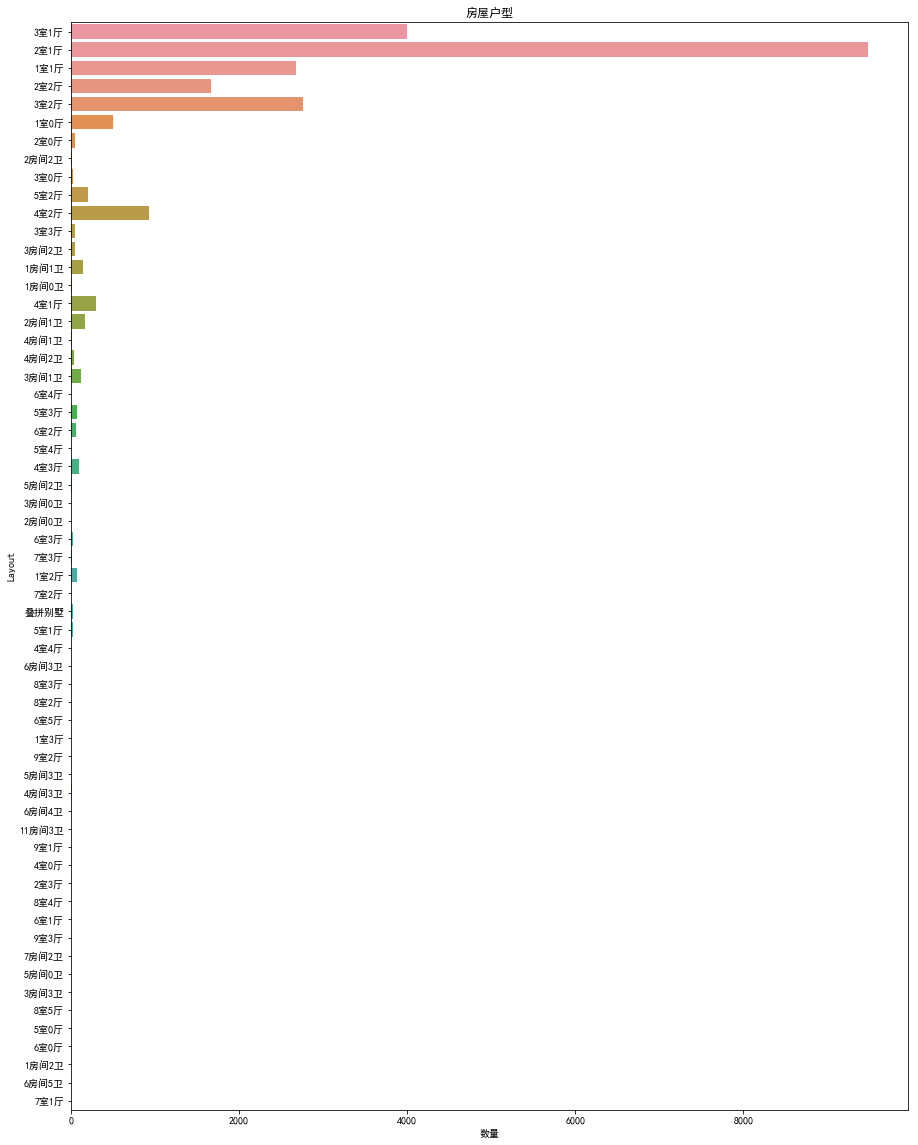

In [18]:
f,ax1 = plt.subplots(figsize=(15,20))
sns.countplot(y="Layout",ax=ax1,data=df)
ax1.set_title("房屋户型")
ax1.set_xlabel("数量")
ax2.set_ylabel("户型")

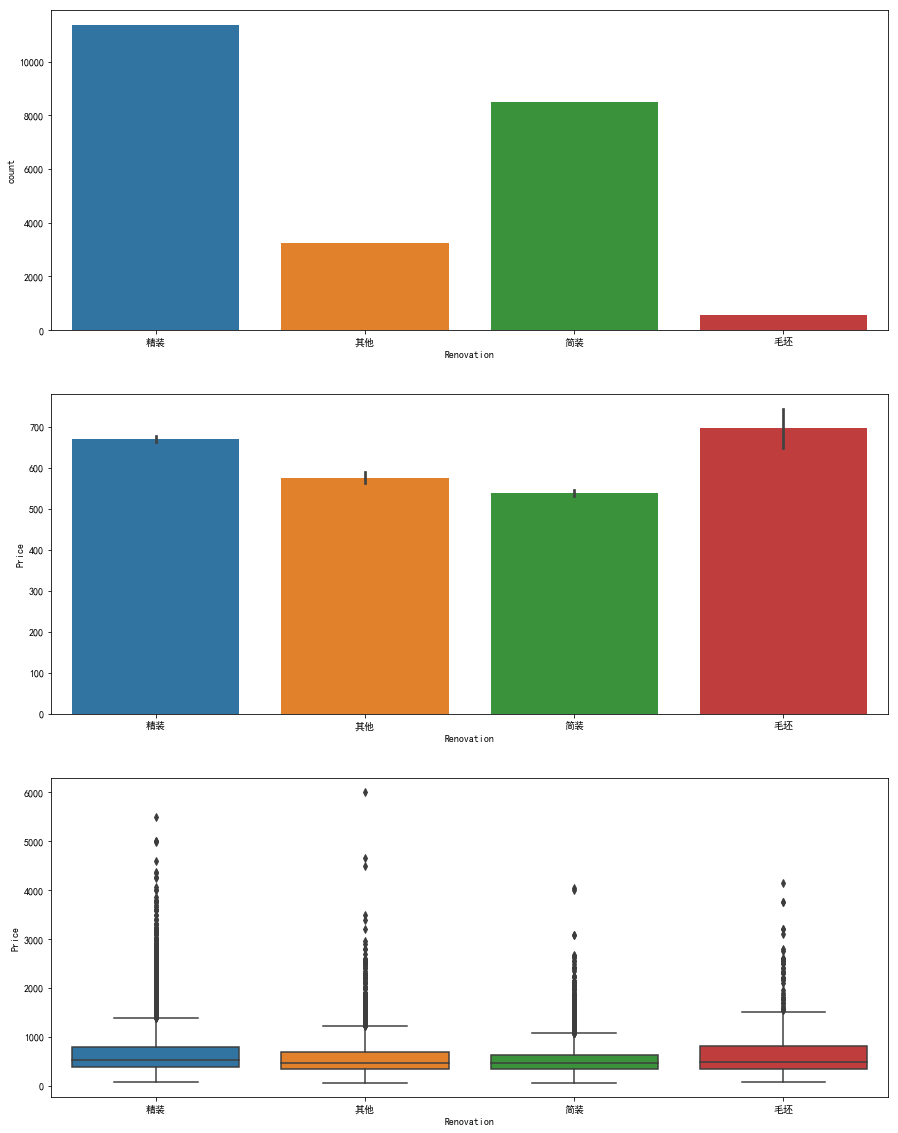

In [19]:
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']
f,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = (15,20))
sns.countplot(df["Renovation"],ax=ax1)
sns.barplot(x="Renovation",y="Price",data=df,ax=ax2)
sns.boxplot(x="Renovation",y="Price",data=df,ax=ax3)

In [20]:
df1 = df
df.loc[(df["Floor"] > 6) & (df["Elevator"].isnull()),"Elevator"] = "有电梯"
df

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,avgPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,有电梯,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,2003,111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,1992,42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,1999,105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,2003,161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,2002,127.0,有电梯,东北,精装,10.236220,1300.0


Text(0,0.5,'总房价')

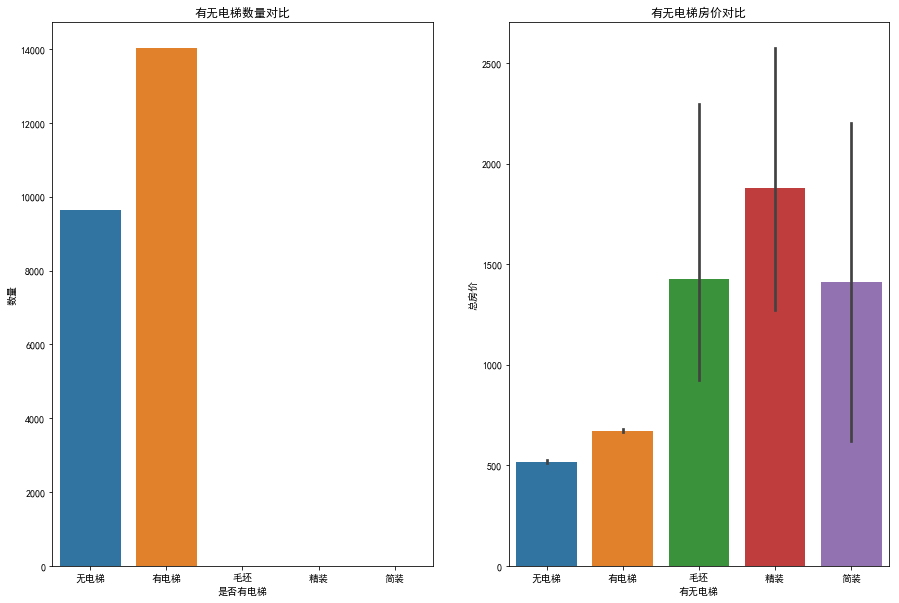

In [21]:

df.loc[(df["Floor"] > 6) & (df["Elevator"].isnull()),"Elevator"] = "有电梯"
df.loc[(df["Floor"] <= 6) & (df["Elevator"].isnull()),"Elevator"] = "无电梯"
f,[ax1,ax2] = plt.subplots(1,2,figsize=(15,10))
sns.countplot(df["Elevator"],ax=ax1)
ax1.set_title("有无电梯数量对比")
ax1.set_xlabel("是否有电梯")
ax1.set_ylabel("数量")
sns.barplot(x="Elevator",y="Price",data=df,ax=ax2)
ax2.set_title("有无电梯房价对比")
ax2.set_xlabel("有无电梯")
ax2.set_ylabel("总房价")

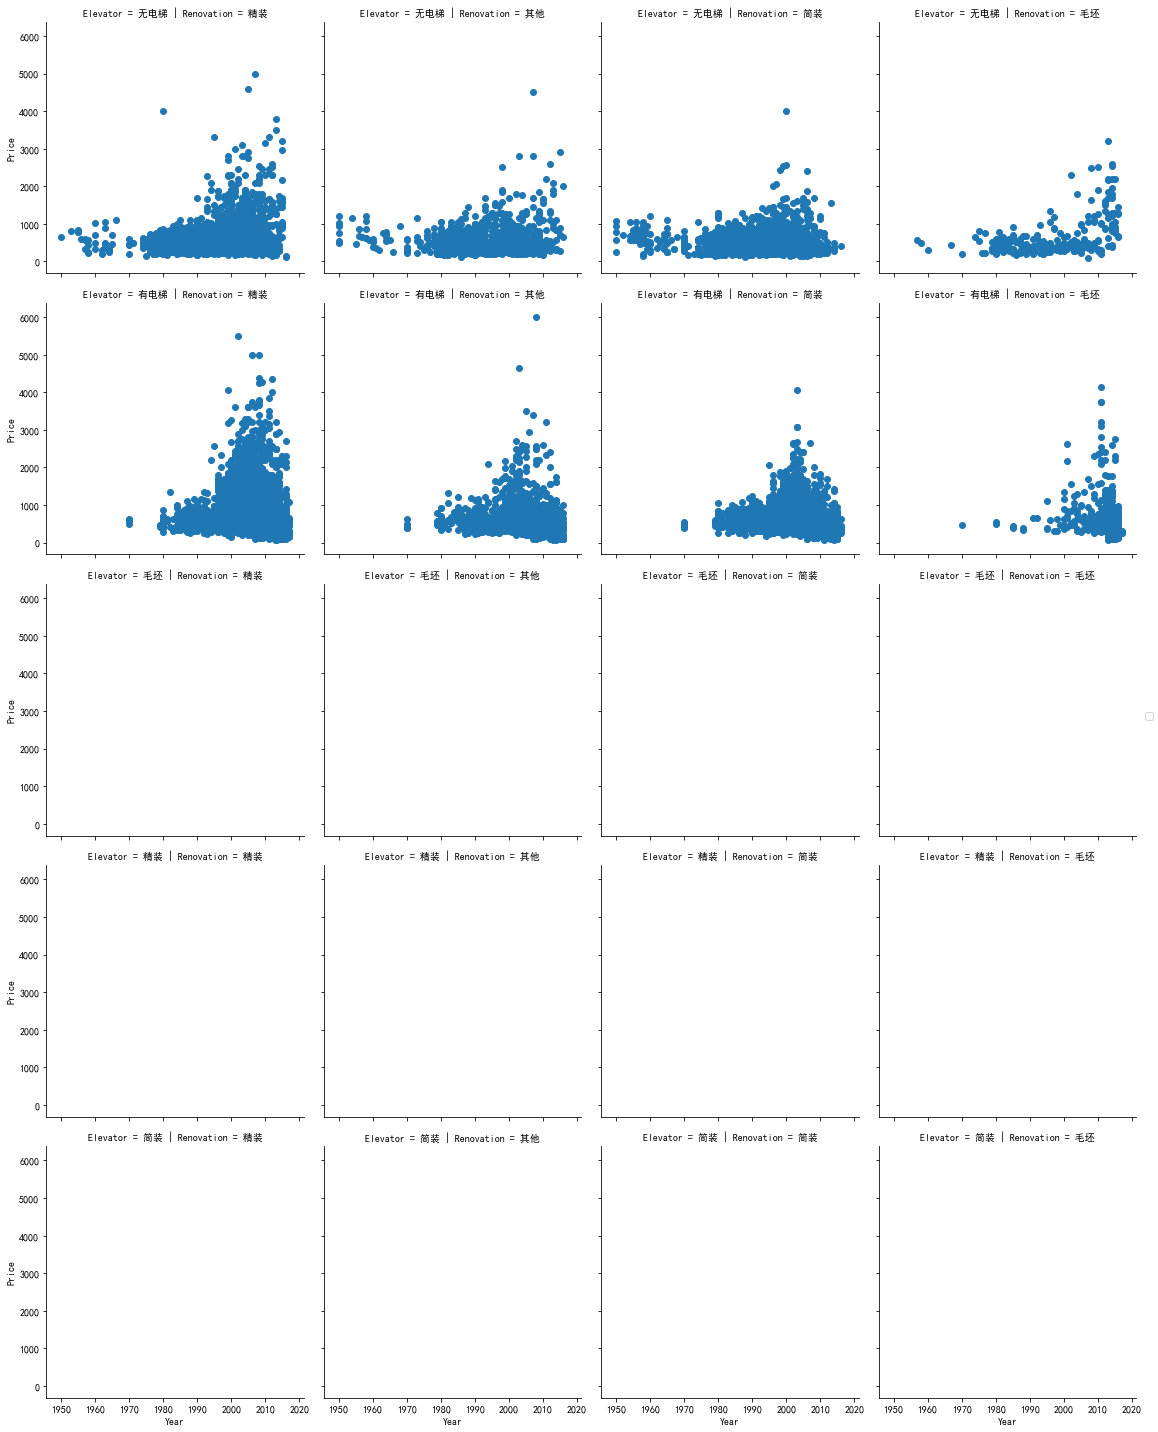

In [22]:

grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

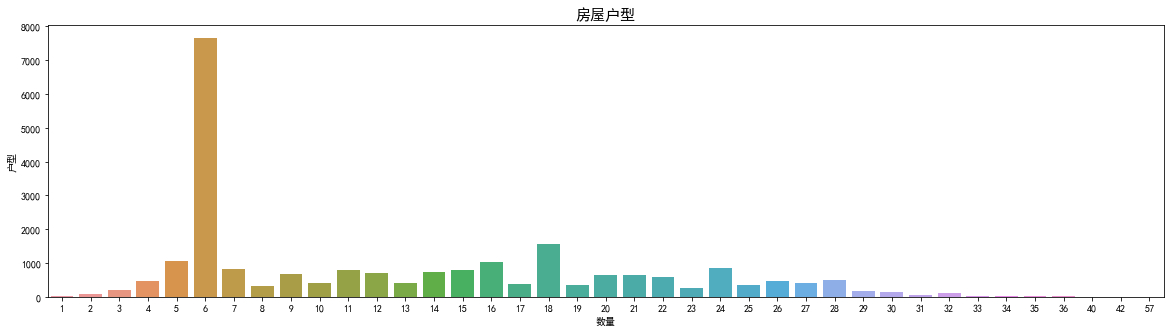

In [23]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()